Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index=labels)
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [8]:
df.info()
# ...or...
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


3. Return the first 3 rows of the DataFrame `df`.

In [17]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


4. Display the 'animal' and 'age' columns from the DataFrame `df`

In [18]:

df[['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [19]:
df.loc[df.index[[3, 4, 8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**6.** Select only the rows where the number of visits is greater than 3.

In [20]:
df[df['visits'] > 3]

,animal,age,visits,priority


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [21]:
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [22]:
df[(df['animal'] == 'cat') & (df['age'] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [23]:
df[df['age'].between(2, 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [25]:
df.loc['f', 'age'] = 1.5

**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [26]:
df['visits'].sum()

19

**12.** Calculate the mean age for each different animal in `df`.

In [27]:
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [28]:
df.loc['k'] = [5.5, 'dog', 'no', 2]

# and then deleting the new row...

df = df.drop('k')

**14.** Count the number of each type of animal in `df`.

In [29]:
df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [30]:
df.sort_values(by=['age', 'visits'], ascending=[False, True])


,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [32]:
df['priority'] = df['priority'].map({'yes': True, 'no': False})

**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [33]:
df['animal'] = df['animal'].replace('snake', 'python')

**18.** Load the ny-flights dataset to Python

In [34]:
flights= pd.read_csv(r'C:\Users\user\Desktop\ny-flights.csv')

**19.** Which airline ID is present maximum times in the dataset

In [35]:
flights.describe()

,airline_id,fl_num,dep_time,dep_delay,arr_time,arr_delay,cancelled
count,20817.000000,20817.000000,18462.000000,18462.000000,18412.000000,18383.000000,20817.00000
mean,20109.614882,1826.098813,1319.991713,22.772127,1493.698566,21.380732,0.11505
std,370.715209,1548.188325,479.999940,59.766152,518.851657,64.605591,0.31909
min,19393.000000,1.000000,1.000000,-112.000000,1.000000,-112.000000,0.00000
25%,19790.000000,472.000000,858.000000,-4.000000,1110.750000,-12.000000,0.00000
50%,20355.000000,1457.000000,1336.000000,0.000000,1519.000000,3.000000,0.00000
75%,20409.000000,2701.000000,1720.000000,22.000000,1923.000000,28.000000,0.00000
max,21171.000000,6258.000000,2400.000000,973.000000,2400.000000,996.000000,1.00000


**20.** Draw a plot between dep_delay and arr_delay

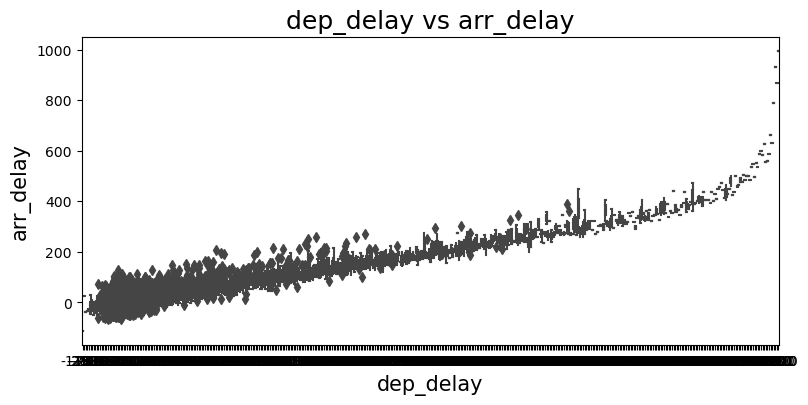

In [47]:
plt.figure(figsize = (9,4))
sns.boxplot(data = flights,x = 'dep_delay',y ="arr_delay")
plt.title("dep_delay vs arr_delay",fontsize = 18)
plt.ylabel("arr_delay",fontsize = 15)
plt.xlabel("dep_delay",fontsize = 15)
plt.show()